In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
np.random.seed(1)

data = pd.read_csv('../datasets/wine-reviews/winemag-data_first150k.csv')

In [3]:
data.drop(['Unnamed: 0'], inplace=True, axis=1)

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

X = data.sample(frac=1).reset_index(drop=True)

X.drop_duplicates(inplace=True)

X.drop(['designation', 'region_1', 'region_2', 'winery'],
       inplace=True, axis=1)
X.dropna(axis=0, inplace=True)

In [15]:
vectorizer = CountVectorizer(stop_words='english')
res = vectorizer.fit_transform(X['description'])
feature_array = vectorizer.get_feature_names()
top = sorted(list(zip(vectorizer.get_feature_names(), 
                                         res.sum(0).getA1())),
                            key=lambda x: x[1], reverse=True)[:1000]

indexes = [feature_array.index(x[0]) for x in top]

res = res[:, indexes]

res.shape

(89128, 1000)

In [16]:
X.drop('description', inplace=True, axis=1)
y = X['points']
X.drop('points', axis=1, inplace=True)
encoder = OneHotEncoder()
price = X['price']
X = encoder.fit_transform(X.drop('price', axis=1))

from scipy.sparse import hstack


X = hstack((X, res, price.to_numpy().reshape(-1, 1)))

features_list = list(encoder.get_feature_names()) + [x[0] for x in top] + ['price']

X.shape

(89128, 2112)

In [17]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

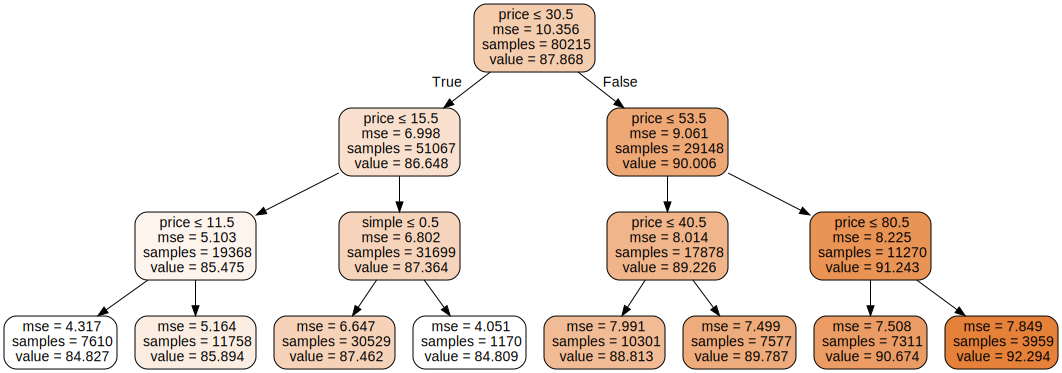

In [20]:

import graphviz 
from sklearn import tree

clf = DecisionTreeRegressor(max_depth=3)
clf.fit(X_train, y_train)
dot_data = dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=features_list,
                      filled=True, rounded=True,  
                      special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [91]:
clf = DecisionTreeRegressor(max_depth=10)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.47050582467601976

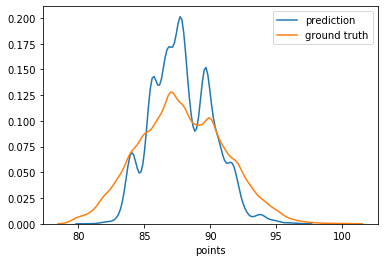

In [92]:
y_pred = clf.predict(X_test)

sns.distplot(y_pred, hist=False, label='prediction')
sns.distplot(y_test, hist=False, label='ground truth')

In [93]:
regression_report(y_pred, y_test)

,name,score
0,explained_variance_score,-0.102297
1,max_error,9.990826
2,mean_absolute_error,1.855048
3,mean_squared_error,5.620089
4,mean_squared_log_error,0.000714
5,median_absolute_error,1.540234
6,r2_score,-0.102309


In [26]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(verbose=1)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

      Iter       Train Loss   Remaining Time 
         1           9.6354           19.78s
         2           9.0487           19.20s
         3           8.5567           17.88s
         4           8.1564           17.31s
         5           7.8207           17.30s
         6           7.5422           16.87s
         7           7.3098           16.30s
         8           7.1178           16.04s
         9           6.9535           15.58s
        10           6.8134           15.25s
        20           6.0374           12.68s
        30           5.6423           10.49s
        40           5.3561            8.71s
        50           5.1350            7.10s
        60           4.9545            5.60s
        70           4.7998            4.16s
        80           4.6683            2.75s
        90           4.5537            1.36s
       100           4.4478            0.00s


0.5726513792750076

In [72]:
clf = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.05, loss='ls', max_depth=10,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=9, min_samples_split=40,
                           min_weight_fraction_leaf=0.0, n_estimators=3000,
                           n_iter_no_change=50, presort='deprecated',
                           random_state=10, subsample=0.95, tol=0.0001,
                           validation_fraction=0.1, verbose=3, warm_start=False)

# clf = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
#                            init=None, learning_rate=0.15, loss='ls', max_depth=7,
#                            max_features='sqrt', max_leaf_nodes=None,
#                            min_impurity_decrease=0.0, min_impurity_split=None,
#                            min_samples_leaf=9, min_samples_split=40,
#                            min_weight_fraction_leaf=0.0, n_estimators=1750,
#                            n_iter_no_change=None, presort='deprecated',
#                            random_state=10, subsample=0.95, tol=0.0001,
#                            validation_fraction=0.1, verbose=3, warm_start=False)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           9.9917           0.3498            5.32m
         2           9.8665           0.1230            3.82m
         3           9.5560           0.2945            3.83m
         4           9.4642           0.1005            3.54m
         5           9.3718           0.1038            3.35m
         6           9.0982           0.2702            3.31m
         7           8.9616           0.1308            3.35m
         8           8.8308           0.1267            3.35m
         9           8.7095           0.1157            3.31m
        10           8.4529           0.2514            3.29m
        11           8.3662           0.1010            3.31m
        12           8.2462           0.1054            3.33m
        13           8.0960           0.1663            3.31m
        14           7.9457           0.1448            3.33m
        15           7.7908           0.1485            3.36m
       

       134           3.6836           0.0099            3.09m
       135           3.6868           0.0070            3.09m
       136           3.6770           0.0071            3.08m
       137           3.6693           0.0058            3.08m
       138           3.6600           0.0083            3.08m
       139           3.6513           0.0111            3.08m
       140           3.6329           0.0057            3.07m
       141           3.6228           0.0135            3.07m
       142           3.6117           0.0056            3.07m
       143           3.6091           0.0065            3.07m
       144           3.6008           0.0058            3.06m
       145           3.5973           0.0054            3.06m
       146           3.5836           0.0054            3.06m
       147           3.5799           0.0037            3.06m
       148           3.5663           0.0099            3.06m
       149           3.5587           0.0045            3.05m
       1

       267           2.9715           0.0022            2.80m
       268           2.9755           0.0018            2.80m
       269           2.9635           0.0011            2.80m
       270           2.9618           0.0013            2.80m
       271           2.9611           0.0011            2.80m
       272           2.9555           0.0020            2.80m
       273           2.9543           0.0022            2.80m
       274           2.9531           0.0013            2.79m
       275           2.9435           0.0019            2.79m
       276           2.9462           0.0015            2.79m
       277           2.9422           0.0015            2.79m
       278           2.9362           0.0030            2.79m
       279           2.9317           0.0027            2.79m
       280           2.9363           0.0024            2.79m
       281           2.9254           0.0014            2.78m
       282           2.9301           0.0005            2.78m
       2

       400           2.6810           0.0006            2.61m
       401           2.6784           0.0000            2.61m
       402           2.6763           0.0008            2.61m
       403           2.6771           0.0009            2.61m
       404           2.6695          -0.0000            2.61m
       405           2.6727           0.0001            2.61m
       406           2.6702           0.0006            2.61m
       407           2.6648          -0.0002            2.61m
       408           2.6570           0.0001            2.61m
       409           2.6652           0.0002            2.60m
       410           2.6607           0.0003            2.60m
       411           2.6722           0.0001            2.60m
       412           2.6601           0.0005            2.60m
       413           2.6607           0.0009            2.60m
       414           2.6570           0.0002            2.59m
       415           2.6566           0.0003            2.59m
       4

       534           2.5036           0.0004            2.44m
       535           2.4968           0.0012            2.44m
       536           2.4990           0.0001            2.44m
       537           2.4903           0.0000            2.44m
       538           2.4921          -0.0001            2.44m
       539           2.4882           0.0005            2.43m
       540           2.4873           0.0000            2.43m
       541           2.4964          -0.0002            2.43m
       542           2.4910          -0.0004            2.43m
       543           2.4907           0.0004            2.43m
       544           2.4902          -0.0002            2.43m
       545           2.4925          -0.0001            2.43m
       546           2.4839           0.0002            2.42m
       547           2.4873           0.0000            2.42m
       548           2.4885           0.0005            2.42m
       549           2.4778          -0.0001            2.42m
       5

       669           2.3596           0.0002            2.29m
       670           2.3619          -0.0000            2.28m
       671           2.3618           0.0000            2.28m
       672           2.3598          -0.0004            2.28m
       673           2.3616          -0.0004            2.28m
       674           2.3604          -0.0003            2.28m
       675           2.3566          -0.0004            2.28m
       676           2.3605          -0.0000            2.28m
       677           2.3579           0.0003            2.28m
       678           2.3543           0.0003            2.27m
       679           2.3546           0.0001            2.27m
       680           2.3571           0.0003            2.27m
       681           2.3542           0.0000            2.27m
       682           2.3579          -0.0002            2.27m
       683           2.3604           0.0001            2.27m
       684           2.3472           0.0000            2.27m
       6

       804           2.2645          -0.0000            2.13m
       805           2.2576          -0.0005            2.13m
       806           2.2588          -0.0000            2.13m
       807           2.2531          -0.0003            2.13m
       808           2.2635          -0.0001            2.13m
       809           2.2618          -0.0001            2.13m
       810           2.2641           0.0001            2.13m
       811           2.2527          -0.0001            2.13m
       812           2.2537          -0.0002            2.12m
       813           2.2581          -0.0002            2.12m
       814           2.2562          -0.0002            2.12m
       815           2.2572          -0.0000            2.12m
       816           2.2560          -0.0001            2.12m
       817           2.2546           0.0000            2.12m
       818           2.2508          -0.0003            2.12m
       819           2.2523          -0.0002            2.12m
       8

       940           2.1766           0.0000            1.99m
       941           2.1768          -0.0005            1.99m
       942           2.1763           0.0001            1.99m
       943           2.1747          -0.0004            1.99m
       944           2.1738          -0.0003            1.99m
       945           2.1764          -0.0002            1.99m
       946           2.1722           0.0001            1.99m
       947           2.1767           0.0000            1.98m
       948           2.1757           0.0002            1.98m
       949           2.1675           0.0000            1.98m
       950           2.1782           0.0000            1.98m
       951           2.1671          -0.0003            1.98m
       952           2.1712          -0.0003            1.98m
       953           2.1703          -0.0001            1.98m
       954           2.1719          -0.0002            1.98m
       955           2.1688          -0.0003            1.98m
       9

      1076           2.1051          -0.0002            1.85m
      1077           2.1018          -0.0000            1.85m
      1078           2.0989          -0.0001            1.85m
      1079           2.1015          -0.0003            1.85m
      1080           2.1014          -0.0001            1.85m
      1081           2.0972          -0.0003            1.84m
      1082           2.0992           0.0005            1.84m
      1083           2.1035          -0.0003            1.84m
      1084           2.0957          -0.0005            1.84m
      1085           2.0928          -0.0003            1.84m
      1086           2.0955          -0.0000            1.84m
      1087           2.0914           0.0000            1.84m
      1088           2.0943           0.0001            1.84m
      1089           2.0926          -0.0003            1.84m
      1090           2.0961          -0.0001            1.84m
      1091           2.0946          -0.0000            1.83m
      10

      1209           2.0391          -0.0002            1.72m
      1210           2.0396          -0.0004            1.72m
      1211           2.0334          -0.0002            1.72m
      1212           2.0401          -0.0004            1.72m
      1213           2.0379           0.0000            1.72m
      1214           2.0285          -0.0000            1.72m
      1215           2.0403          -0.0001            1.71m
      1216           2.0361          -0.0000            1.71m
      1217           2.0352          -0.0002            1.71m
      1218           2.0341          -0.0003            1.71m
      1219           2.0349          -0.0002            1.71m
      1220           2.0318           0.0003            1.71m
      1221           2.0315          -0.0003            1.71m
      1222           2.0325           0.0001            1.71m
      1223           2.0370          -0.0000            1.71m
      1224           2.0305          -0.0004            1.70m
      12

      1342           1.9783          -0.0004            1.60m
      1343           1.9776           0.0001            1.60m
      1344           1.9773          -0.0004            1.60m
      1345           1.9789          -0.0000            1.60m
      1346           1.9740          -0.0003            1.59m
      1347           1.9742          -0.0000            1.59m
      1348           1.9739          -0.0002            1.59m
      1349           1.9765          -0.0002            1.59m
      1350           1.9785          -0.0001            1.59m
      1351           1.9738          -0.0001            1.59m
      1352           1.9766          -0.0006            1.59m
      1353           1.9721          -0.0000            1.59m
      1354           1.9715          -0.0003            1.59m
      1355           1.9737           0.0000            1.59m
      1356           1.9760           0.0001            1.59m
      1357           1.9678          -0.0001            1.58m
      13

      1478           1.9248          -0.0003            1.47m
      1479           1.9225          -0.0004            1.47m
      1480           1.9253           0.0000            1.47m
      1481           1.9266          -0.0002            1.46m
      1482           1.9231           0.0003            1.46m
      1483           1.9203          -0.0000            1.46m
      1484           1.9198          -0.0001            1.46m
      1485           1.9234          -0.0000            1.46m
      1486           1.9248          -0.0002            1.46m
      1487           1.9194          -0.0002            1.46m
      1488           1.9231          -0.0003            1.46m
      1489           1.9135          -0.0002            1.46m
      1490           1.9199          -0.0001            1.46m
      1491           1.9175          -0.0002            1.46m
      1492           1.9211           0.0001            1.45m
      1493           1.9186          -0.0002            1.45m
      14

      1614           1.8778          -0.0001            1.34m
      1615           1.8760          -0.0002            1.34m
      1616           1.8761          -0.0002            1.33m
      1617           1.8726          -0.0002            1.33m
      1618           1.8657           0.0001            1.33m
      1619           1.8719          -0.0002            1.33m
      1620           1.8725          -0.0003            1.33m
      1621           1.8692          -0.0001            1.33m
      1622           1.8725          -0.0001            1.33m
      1623           1.8696          -0.0001            1.33m
      1624           1.8745          -0.0001            1.33m
      1625           1.8708          -0.0002            1.33m
      1626           1.8700          -0.0002            1.32m
      1627           1.8660          -0.0003            1.32m
      1628           1.8666          -0.0003            1.32m
      1629           1.8661          -0.0004            1.32m
      16

      1747           1.8327          -0.0003            1.21m
      1748           1.8292          -0.0001            1.21m
      1749           1.8297          -0.0000            1.21m
      1750           1.8298          -0.0001            1.21m
      1751           1.8248          -0.0004            1.20m
      1752           1.8270          -0.0002            1.20m
      1753           1.8297          -0.0002            1.20m
      1754           1.8298          -0.0003            1.20m
      1755           1.8227          -0.0003            1.20m
      1756           1.8273          -0.0002            1.20m
      1757           1.8239          -0.0002            1.20m
      1758           1.8261          -0.0002            1.20m
      1759           1.8271          -0.0003            1.20m
      1760           1.8274          -0.0001            1.20m
      1761           1.8306          -0.0003            1.20m
      1762           1.8287          -0.0002            1.19m
      17

      1883           1.7833          -0.0004            1.08m
      1884           1.7841          -0.0002            1.08m
      1885           1.7826          -0.0002            1.08m
      1886           1.7850          -0.0002            1.07m
      1887           1.7852          -0.0000            1.07m
      1888           1.7830          -0.0002            1.07m
      1889           1.7811          -0.0003            1.07m
      1890           1.7823          -0.0002            1.07m
      1891           1.7782          -0.0002            1.07m
      1892           1.7820          -0.0001            1.07m
      1893           1.7833          -0.0002            1.07m
      1894           1.7821          -0.0003            1.07m
      1895           1.7793          -0.0002            1.07m
      1896           1.7768          -0.0003            1.07m
      1897           1.7806          -0.0004            1.06m
      1898           1.7776          -0.0001            1.06m
      18

      2016           1.7432          -0.0002           57.02s
      2017           1.7461          -0.0004           56.97s
      2018           1.7423          -0.0002           56.92s
      2019           1.7454          -0.0001           56.86s
      2020           1.7400          -0.0000           56.81s
      2021           1.7422          -0.0001           56.75s
      2022           1.7379          -0.0001           56.69s
      2023           1.7399          -0.0003           56.62s
      2024           1.7452          -0.0002           56.57s
      2025           1.7432          -0.0003           56.51s
      2026           1.7412          -0.0000           56.47s
      2027           1.7406          -0.0002           56.43s
      2028           1.7414          -0.0001           56.37s
      2029           1.7368          -0.0001           56.33s
      2030           1.7419           0.0001           56.27s
      2031           1.7349           0.0000           56.22s
      20

      2151           1.7086          -0.0001           49.26s
      2152           1.7055          -0.0001           49.20s
      2153           1.7016           0.0000           49.13s
      2154           1.7065          -0.0001           49.07s
      2155           1.7083          -0.0002           49.01s
      2156           1.7072          -0.0003           48.95s
      2157           1.7059          -0.0002           48.88s
      2158           1.7049           0.0001           48.83s
      2159           1.7050          -0.0003           48.77s
      2160           1.7088          -0.0003           48.70s
      2161           1.7048          -0.0002           48.64s
      2162           1.7074          -0.0001           48.58s
      2163           1.7034          -0.0001           48.53s
      2164           1.7061          -0.0002           48.48s
      2165           1.7073          -0.0000           48.42s
      2166           1.7002          -0.0002           48.37s
      21

      2285           1.6748          -0.0002           41.79s
      2286           1.6712          -0.0001           41.74s
      2287           1.6727          -0.0000           41.68s
      2288           1.6708          -0.0002           41.62s
      2289           1.6729          -0.0001           41.56s
      2290           1.6735          -0.0003           41.50s
      2291           1.6715          -0.0002           41.43s
      2292           1.6713          -0.0003           41.37s
      2293           1.6707          -0.0001           41.31s
      2294           1.6661          -0.0001           41.26s
      2295           1.6719          -0.0002           41.19s
      2296           1.6730          -0.0004           41.13s
      2297           1.6679          -0.0002           41.08s
      2298           1.6703          -0.0001           41.02s
      2299           1.6679           0.0000           40.97s
      2300           1.6673          -0.0001           40.91s
      23

      2421           1.6377          -0.0001           33.94s
      2422           1.6437          -0.0003           33.88s
      2423           1.6397           0.0000           33.83s
      2424           1.6409          -0.0002           33.78s
      2425           1.6409          -0.0002           33.72s
      2426           1.6387          -0.0001           33.66s
      2427           1.6413          -0.0000           33.60s
      2428           1.6404          -0.0001           33.55s
      2429           1.6415          -0.0002           33.49s
      2430           1.6414           0.0002           33.43s
      2431           1.6390          -0.0003           33.38s
      2432           1.6406          -0.0001           33.32s
      2433           1.6348          -0.0001           33.26s
      2434           1.6394          -0.0001           33.20s
      2435           1.6369          -0.0000           33.14s
      2436           1.6380           0.0000           33.08s
      24

      2557           1.6071          -0.0003           26.13s
      2558           1.6098          -0.0002           26.08s
      2559           1.6081          -0.0001           26.02s
      2560           1.6075          -0.0002           25.96s
      2561           1.6085          -0.0003           25.90s
      2562           1.6081          -0.0001           25.84s
      2563           1.6104          -0.0001           25.78s
      2564           1.6089          -0.0001           25.73s
      2565           1.6075          -0.0001           25.67s
      2566           1.6049          -0.0003           25.61s
      2567           1.6025          -0.0000           25.55s
      2568           1.6043          -0.0000           25.49s
      2569           1.6053          -0.0002           25.44s
      2570           1.6051          -0.0002           25.38s
      2571           1.6059          -0.0000           25.32s
      2572           1.6067          -0.0002           25.26s
      25

      2692           1.5743          -0.0001           18.23s
      2693           1.5773          -0.0000           18.17s
      2694           1.5779          -0.0002           18.11s
      2695           1.5794          -0.0002           18.05s
      2696           1.5755          -0.0000           18.00s
      2697           1.5789          -0.0003           17.94s
      2698           1.5793          -0.0001           17.88s
      2699           1.5776          -0.0001           17.82s
      2700           1.5755          -0.0002           17.76s
      2701           1.5779          -0.0003           17.70s
      2702           1.5752          -0.0004           17.64s
      2703           1.5706          -0.0002           17.58s
      2704           1.5751          -0.0002           17.52s
      2705           1.5756          -0.0002           17.46s
      2706           1.5775          -0.0002           17.40s
      2707           1.5740          -0.0004           17.34s
      27

      2825           1.5489          -0.0002           10.34s
      2826           1.5482          -0.0002           10.29s
      2827           1.5476          -0.0003           10.23s
      2828           1.5474          -0.0003           10.17s
      2829           1.5431          -0.0001           10.11s
      2830           1.5509          -0.0001           10.05s
      2831           1.5444          -0.0001            9.99s
      2832           1.5439           0.0000            9.93s
      2833           1.5468          -0.0001            9.87s
      2834           1.5485          -0.0000            9.81s
      2835           1.5519          -0.0001            9.75s
      2836           1.5497          -0.0002            9.69s
      2837           1.5471          -0.0002            9.63s
      2838           1.5458          -0.0000            9.57s
      2839           1.5446          -0.0002            9.51s
      2840           1.5446          -0.0001            9.45s
      28

      2959           1.5209          -0.0001            2.43s
      2960           1.5227          -0.0004            2.37s
      2961           1.5230          -0.0001            2.31s
      2962           1.5208          -0.0001            2.25s
      2963           1.5209          -0.0001            2.19s
      2964           1.5198          -0.0002            2.13s
      2965           1.5191          -0.0001            2.07s
      2966           1.5224          -0.0001            2.01s
      2967           1.5222          -0.0002            1.95s
      2968           1.5156          -0.0000            1.89s
      2969           1.5227          -0.0002            1.83s
      2970           1.5213          -0.0002            1.77s
      2971           1.5180          -0.0001            1.72s
      2972           1.5186          -0.0002            1.66s
      2973           1.5154          -0.0002            1.60s
      2974           1.5198          -0.0001            1.54s
      29

0.7679192814112624

In [76]:
from sklearn.metrics import *

def regression_report(y_true, y_pred):
    metrics = [
        explained_variance_score,
        max_error,
        mean_absolute_error,
        mean_squared_error,
        mean_squared_log_error,
        median_absolute_error,
        r2_score
    ]
    return pd.DataFrame([(metric.__name__, metric(y_true, y_pred)) for metric in metrics],
                      columns=['name', 'score'])

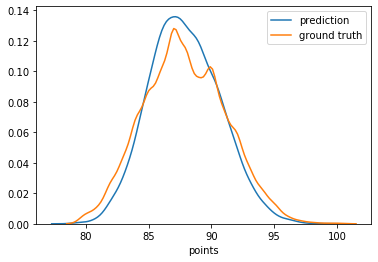

In [74]:
import seaborn as sns

y_pred = clf.predict(X_test)



sns.distplot(y_pred, hist=False, label='prediction')
sns.distplot(y_test, hist=False, label='ground truth')

In [77]:
regression_report(y_pred, y_test)

,name,score
0,explained_variance_score,0.688510
1,max_error,8.515848
2,mean_absolute_error,1.222603
3,mean_squared_error,2.463321
4,mean_squared_log_error,0.000311
5,median_absolute_error,0.982602
6,r2_score,0.688509


In [79]:
cross_val_score(clf, X, y, cv=7, verbose=3, n_jobs=-1)

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   3 out of   7 | elapsed:  7.1min remaining:  9.5min
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:  7.3min finished


array([0.76127549, 0.75699683, 0.75742195, 0.75692104, 0.75840449,
       0.75638637, 0.75335418])

In [123]:
hyperparameters = {
    'n_estimators':[100,250,500,750,1000,1250,1500,1750],
    'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
    'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split':[2,4,6,8,10,20,40,60,100],
    'min_samples_leaf':[1,3,5,7,9],
    'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
}

tuning = GridSearchCV(estimator=GradientBoostingRegressor(),
                      param_grid=hyperparameters,
                      cv=5, n_jobs=7, scoring='r2', verbose=1000)
tuning.fit(X_train, y_train)
tuning.best_estimator_, tuning.best_score_, tuning.best_params_, tuning.cv_results_

Fitting 5 folds for each of 136080 candidates, totalling 680400 fits
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
Memmapping (shape=(1797560,), dtype=int32) to new file /dev/shm/joblib_memmapping_folder_10298_7296807772/10298-139711483625168-663bf058e02d458da428e2b6ef51cd10.pkl
Pickling array (shape=(80216,), dtype=int32).
Memmapping (shape=(1797560,), dtype=float64) to new file /dev/shm/joblib_memmapping_folder_10298_7296807772/10298-139711483625168-0417867836b34ebdb5f26d56ef242a78.pkl
Pickling array (shape=(80215,), dtype=int64).
Pickling array (shape=(80215,), dtype=int64).
Pickling array (shape=(80215,), dtype=int64).
Pickling array (shape=(64172,), dtype=int64).
Pickling array (shape=(16043,), dtype=int64).
Memmapping (shape=(1797560,), dtype=int32) to old file /dev/shm/joblib_memmapping_folder_10298_7296807772/10298-139711483625168-663bf058e02d458da428e2b6ef51cd10.pkl
Pickling array (shape=(80216,), dtype=int32).
Memmapping (shape=(1797560,), dtype=f

[Parallel(n_jobs=7)]: Done   6 tasks      | elapsed:   29.6s
Memmapping (shape=(1797560,), dtype=int32) to old file /dev/shm/joblib_memmapping_folder_10298_7296807772/10298-139711483625168-663bf058e02d458da428e2b6ef51cd10.pkl
Pickling array (shape=(80216,), dtype=int32).
Memmapping (shape=(1797560,), dtype=float64) to old file /dev/shm/joblib_memmapping_folder_10298_7296807772/10298-139711483625168-0417867836b34ebdb5f26d56ef242a78.pkl
Pickling array (shape=(80215,), dtype=int64).
Pickling array (shape=(80215,), dtype=int64).
Pickling array (shape=(80215,), dtype=int64).
Pickling array (shape=(64172,), dtype=int64).
Pickling array (shape=(16043,), dtype=int64).
[Parallel(n_jobs=7)]: Done   7 tasks      | elapsed:   31.6s
Memmapping (shape=(1797560,), dtype=int32) to old file /dev/shm/joblib_memmapping_folder_10298_7296807772/10298-139711483625168-663bf058e02d458da428e2b6ef51cd10.pkl
Pickling array (shape=(80216,), dtype=int32).
Memmapping (shape=(1797560,), dtype=float64) to old file /d

Memmapping (shape=(1797560,), dtype=int32) to old file /dev/shm/joblib_memmapping_folder_10298_7296807772/10298-139711483625168-663bf058e02d458da428e2b6ef51cd10.pkl
Pickling array (shape=(80216,), dtype=int32).
Memmapping (shape=(1797560,), dtype=float64) to old file /dev/shm/joblib_memmapping_folder_10298_7296807772/10298-139711483625168-0417867836b34ebdb5f26d56ef242a78.pkl
Pickling array (shape=(80215,), dtype=int64).
Pickling array (shape=(80215,), dtype=int64).
Pickling array (shape=(80215,), dtype=int64).
Pickling array (shape=(64172,), dtype=int64).
Pickling array (shape=(16043,), dtype=int64).
Memmapping (shape=(1797560,), dtype=int32) to old file /dev/shm/joblib_memmapping_folder_10298_7296807772/10298-139711483625168-663bf058e02d458da428e2b6ef51cd10.pkl
Pickling array (shape=(80216,), dtype=int32).
Memmapping (shape=(1797560,), dtype=float64) to old file /dev/shm/joblib_memmapping_folder_10298_7296807772/10298-139711483625168-0417867836b34ebdb5f26d56ef242a78.pkl
Pickling array

KeyboardInterrupt: 